In [3]:
"""Trace la courbe de la loi de Zipf à partir du corpus

Parameters
-----------
None

Returns
----------
affichage de la loi de Zipf illustrée par les données du corpus"""

'Trace la courbe de la loi de Zipf à partir du corpus\n\nParameters\n-----------\nNone\n\nReturns\n----------\naffichage de la loi de Zipf illustrée par les données du corpus'

In [5]:
import spacy
import json
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt

# Fonction d'importation du corpus lemmatisé depuis un fichier json local:

In [6]:
def load_json(input_file:str) :
    """Open and read json file
    
    Parameters
    ----------
    input_file : str
    
    Returns
    ---------
    corpus as a dictionnary of dictionnaries"""
    
    with input_file.open("r", encoding="utf-8") as f:
        data = json.load(f)
    
    return data

data = load_json(Path("../data/raw/corpus_v1.json"))
print(data["reviews"][0])

{'customer_id': '76561197990951542', 'helpful_vote': 3430, 'product_id': '1716740', 'product_title': 'Starfield', 'review_body': '77hrs in: "finished" starfield.\n\nNow, it has a NG+ mode which is intriguing, so I\'m actually still playing it ... but the story actively encourages you to finish it multiple times .. and restart over and over and over, which is ... curious. So I\'m onboard.\n\nI\'m still on the fence about the title as a whole.\n\nEnjoying it? Yes, very much.\n\nBut it\'s hard to compare to previous titles (such as Fallout4) because I ended up playing those in a heavily modded state, which skews my memory of the raw, unmodded game.\n\nStarfield is currently raw and unmodded. It is an RPG. It\'s a story. It\'s not about exploration, space flight, or space trucking. It\'s an adventure. It has a story and you are a participant.\n\nThe Bethesda feel is here in spades, and that includes a clunky interface with awful/useless filters and options (gadamn Bethesda, will you grow u

# Fonction pour extraire les lemmes d'un texte en excluant la ponctuation

In [7]:
nlp = spacy.load("en_core_web_sm")

def get_words_lemmas(review:str, nlp) :
    """extrait les lemmes d'un texte en excluant les ponctuations
    
    Parameters
    ----------
    review : str
    nlp : spacy language model, preloaded before the function
    
    Returns :
    ----------
    list of lemmas without punctuations."""
    
    analyse = nlp(review)
    lemmas = [token.lemma_ for token in analyse if token.pos_ != "PUNCT"]
    
    return lemmas
    

# Plot de la loi de Zipf à partir des lemmes du corpus:
J'ai choisi d'afficher seulement les 500 premiers mots les plus courants, sinon la courbe devenait moins lisibles (voir en dessous pour la courbe sans ce zoom)

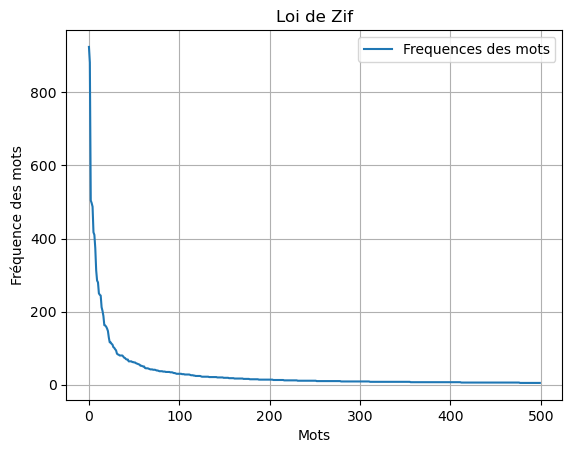

In [8]:
# calcul des fréquences des lemmes extraits par spacy, en excluant les ponctuations
lemmas_total = []
for review in data["reviews"]:
    lemmas_total = lemmas_total + get_words_lemmas(review["review_body"], nlp)
    
frequences = sorted(dict(Counter(lemmas_total)).items(), key=lambda x: x[1], reverse=True)
lemmas_etiquettes = [lemma[0] for lemma in frequences]
lemmas_freq = [freq[1] for freq in frequences]

# Génération du plot : 500 mots les plus fréquents pour rendre le graph plus lisible
x_max = list(range(len(lemmas_etiquettes[0:500])))

plt.plot(x_max, lemmas_freq[0:500], label="Frequences des mots")
plt.title('Loi de Zif')
plt.xlabel('Mots')
plt.ylabel('Fréquence des mots')
plt.legend()
plt.grid(True)
plt.show()

# Sans le zoom :

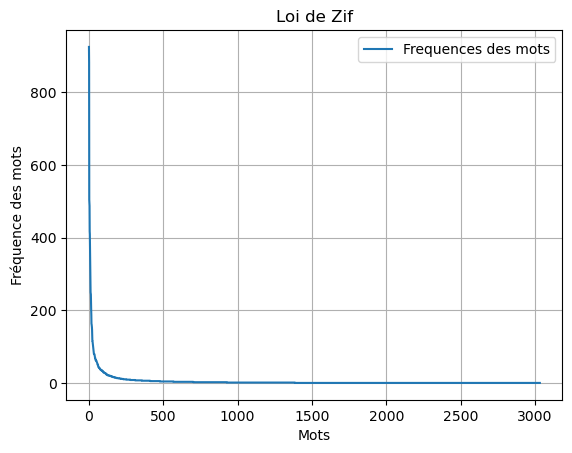

In [9]:
x_max = list(range(len(lemmas_etiquettes)))

plt.plot(x_max, lemmas_freq, label="Frequences des mots")
plt.title('Loi de Zif')
plt.xlabel('Mots')
plt.ylabel('Fréquence des mots')
plt.legend()
plt.grid(True)
plt.show()